# Tutorial on MEEP simulation run with phcr-cavity.py
The tutorial is based on __[documentation example](https://meep.readthedocs.io/en/latest/Python_Tutorials/Resonant_Modes_and_Transmission_in_a_Waveguide_Cavity/)__. 

To run the simulation we have to address the python translator by running system command with <b>!</b> symbol. 

We run simulation code <b>phcr-cavity.py</b>

The console output is saved at <b>Output.txt</b>

In [ ]:
#!/bin/bash
import numpy as np

width = np.arange(1.1, 1.6, 0.1)

a_period = [(0.80, 0.75), (0.80, 0.70),
            (0.70, 0.65), (0.70, 0.60),
            (0.60, 0.55), (0.60, 0.50)]

s_cavity = np.arange(0, 0.210, 0.020)

for wdth in width:
    for a_st, a_en in a_period:
        for scav in s_cavity:
            ! mpirun -np 16 python v2p1_nanobeam_Simpetus.py -a_start {a_st} -a_end {a_en} -s_cav {scav} -w {wdth} > nanobeam_width_{a_st}_{a_en}_{scav}_{wdth}.out
            ! grep harminv0: nanobeam_width_{a_st}_{a_en}_{scav}_{wdth}.out |cut -d , -f2,4 |grep -v frequency >> nanobeam_width_{a_st}_{a_en}_{scav}_{wdth}.dat

In [16]:
! mpirun -np 16 python v2_nanobeam_Simpetus.py -s_cav 0.146 > Output-nanobeam_Simpetus_v2.txt

In [70]:
import numpy as np
from scipy.optimize import minimize

def quality_factor(x0):
    a_st, a_en, s_cv, rad, wdt, n_df, n_wg = x0
    ! mpirun -np 16 python v2p1_nanobeam_Simpetus.py -a_start {a_st} -a_end {a_en} -s_cav {s_cv} -r {rad} -w {wdt} -Ndef {n_df} -Nwvg {n_wg}> nanobeam_cavity.out
    ! grep harminv0: nanobeam_cavity.out |cut -d , -f2,4 |grep -v frequency >> nanobeam.dat
    f = np.genfromtxt("nanobeam.dat", delimiter=",")
    # f = f.astype(float)
    if f.size == 0:
        return 'Пустой файл "nanobeam.dat"'
    elif f.ndim == 1:
        frq = f[0]
        Q = f[1]
    elif f.ndim > 1:
        frq = f[:,0]
        Q = f[:,1]
    f = np.column_stack([frq, Q])
    f = f.astype(dtype=float)
    for i in range(frq.size):
        if 0.6410 <= frq[i] <= 0.6493:
            return -f[i,1]
    
x0 = [0.7, 0.65, 0.15, 0.18, 0.5, 3, 8]

res = minimize(quality_factor, x0, method='BFGS', jac=None,
               options={'disp': True})

print(res.x)

usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                          

/home/cloud-user/pmp/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: genfromtxt: Empty input file: "nanobeam.dat"
  


usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                                 [-Ndef NDEF] [-Nwvg NWVG]
v2p1_nanobeam_Simpetus.py: error: argument -Ndef: invalid int value: '3.0'
usage: v2p1_nanobeam_Simpetus.py [-h] [-a_start A_START] [-a_end A_END]
                                 [-s_cav S_CAV] [-r R] [-hh HH] [-w W]
                          

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U26'), dtype('<U26')) -> None

In [54]:
import numpy as np
from scipy.optimize import minimize

def fun(x):
    x_1, x_2 = x
    return (x_1 - 1)**2 + (x_2 - 2)**2 + 5
    
x0 = np.array([2, 2])
# x_1, x_2 = x0

res = minimize(fun, x0, method='BFGS', jac=None,
               options={'gtol': 1e-6, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3
[0.99999999 1.99999994]


In [21]:
#!/bin/bash
import numpy as np

for scav in np.arange(0.100, 0.185, 0.005):
    ! mpirun -np 16 python v2_nanobeam_Simpetus.py -s_cav {scav} > nanobeam_cavity_length_{scav}.out
    ! grep harminv0: nanobeam_cavity_length_{scav}.out |cut -d , -f2,4 |grep -v frequency >> nanobeam_cavity_varylength.dat

In [ ]:
#!/bin/bash
import numpy as np
# a_period = [(0.70, 0.65), (0.70, 0.60), (0.70, 0.55), (0.7, 0.50)]
a_period = [(0.60, 0.55), (0.60, 0.50), (0.60, 0.45), (0.6, 0.40)]
# a_period = [(0.50, 0.45), (0.50, 0.40), (0.50, 0.35), (0.5, 0.30)]

s_cavity = np.arange(0.000, 0.120, 0.020)

for a_st, a_en in a_period:
    for scav in s_cavity:
        ! mpirun -np 16 python v2p1_nanobeam_Simpetus.py -a_start {a_st} -a_end {a_en} -s_cav {scav} > nanobeam_cavity_length_{a_st}_{a_en}_{scav}.out
        ! grep harminv0: nanobeam_cavity_length_{a_st}_{a_en}_{scav}.out |cut -d , -f2,4 |grep -v frequency >> nanobeam_cavity_vary_s_length_{a_st}_{a_en}.dat


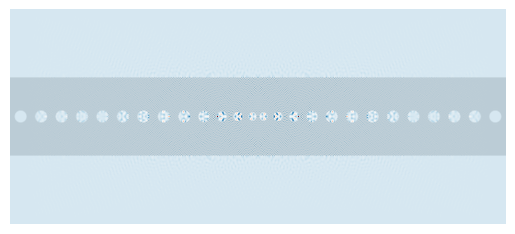

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

eps_h5file = h5py.File('v2p1_nanobeam_Simpetus-eps-000621.19.h5','r')
eps_data = np.array(eps_h5file['eps'])
ey_h5file = h5py.File('v2p1_nanobeam_Simpetus-ey-000621.19.h5','r')
ey_data = np.array(ey_h5file['ey'])
plt.figure(dpi=100)
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ey_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

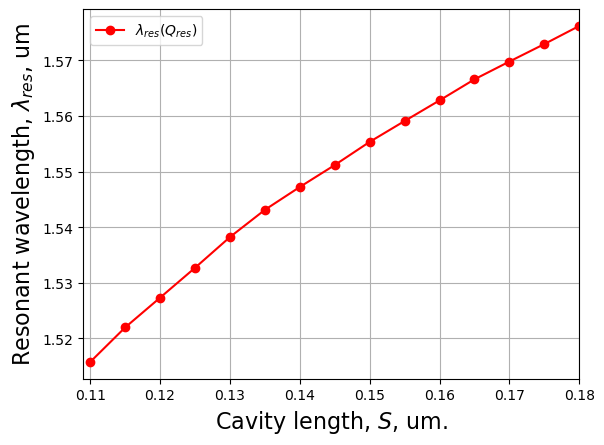

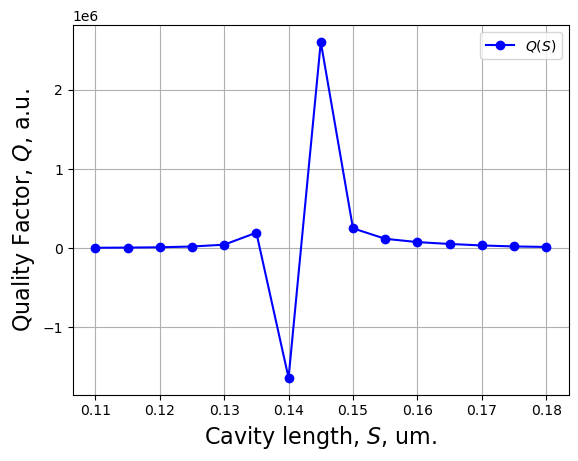

[4.3e-07, 4.0500000000000004e-07, 3.8e-07, 3.55e-07, 3.3e-07]
1.9e-06
[0.11  0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165
 0.17  0.175 0.18 ]


In [27]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
import matplotlib.pyplot as plt

wavelength = 1.550   # resonant wavelength (um)
a = 1.01334        # units of um
h = 0.220         # units of um
w = 0.500         # units of um

nSi = 3.45

g = 2*np.pi/a       # reciprocal lattice vector

c = 1 # units of um

f = np.genfromtxt("nanobeam_cavity_varylength.dat", delimiter=",")

omega_res = f[:,0]*g*c
v_res_THz = omega_res/(2*np.pi*1e12)
# lambda_res = c/(v_res_THz*1e12)
lambda_res = 1/f[:,0]

Q_res = f[:,1]

scav = np.arange(0.110, 0.185, 0.005)

# ###########################################################################

fig, ax = plt.subplots()   

ax.plot(scav, lambda_res, **{'color': 'red', 'marker': 'o'}, label='$\lambda_{res} (Q_{res})$')
ax.set_ylabel("Resonant wavelength, $\lambda_{res}$, um", size=16)
ax.set_xlabel("Cavity length, $\it{S}$, um.", size=16)
plt.xlim(left=0.109, right=0.18)
ax.grid()
plt.legend()
plt.show()


fig, ax = plt.subplots()   

ax.plot(scav, Q_res, **{'color': 'blue', 'marker': 'o'}, label='$\it{Q}$($\it{S}$)')
ax.set_ylabel("Quality Factor, $\it{Q}$, a.u.", size=16)
ax.set_xlabel("Cavity length, $\it{S}$, um.", size=16)
ax.grid()
plt.legend()
plt.show()


Ndef = 3
a_start = 0.43e-6
a_end = 0.33e-6

a_taper = mp.interpolate(Ndef, [a_start,a_end])

print(a_taper)
print(sum(a_taper))
print(scav)

For optional parallel run on several core we use mpi.

We may execute  <b>mpirun -np 6 </b>  routine for running the code with 6 cores:

In [31]:
import meep as mp
from meep import mpb
import math as mt
import numpy as np
import matplotlib.pyplot as plt

# wavelength = 1.550   # resonant wavelength (um)
# h = 0.220         # units of um
# w = 2.300         # units of um

# nSi3N4 = 1.996
# c = 1 # units of um

a_period = [(0.70, 0.65), (0.70, 0.60), (0.70, 0.55), (0.7, 0.50)]
# a_period = [(0.60, 0.55), (0.60, 0.50), (0.60, 0.45), (0.6, 0.40)]

s_cavity = np.arange(0, 0.190, 0.010)

for a_st, a_en in a_period:
    for scav in s_cavity:
        ! mpirun -np 16 python v2_nanobeam_Simpetus.py -a_start {a_st} -a_end {a_en} -s_cav {scav} > nanobeam_cavity_length_{a_st}_{a_en}_{scav}.out
        ! grep harminv0: nanobeam_cavity_length_{a_st}_{a_en}_{scav}.out |cut -d , -f2,4 |grep -v frequency >> nanobeam_cavity_vary_s_length_{a_st}_{a_en}.dat
    
    # ! rm nanobeam_cavity_length*.out
        
# f = np.genfromtxt("nanobeam_cavity_varylength.dat", delimiter=",")

# lambda_res = 1/f[:,0]

# Q_res = f[:,1]

# scav = np.arange(0.110, 0.185, 0.005)

# # ###########################################################################

# fig, ax = plt.subplots()   

# ax.plot(scav, lambda_res, **{'color': 'red', 'marker': 'o'}, label='$\lambda_{res} (Q_{res})$')
# ax.set_ylabel("Resonant wavelength, $\lambda_{res}$, um", size=16)
# ax.set_xlabel("Cavity length, $\it{S}$, um.", size=16)
# plt.xlim(left=0.109, right=0.18)
# ax.grid()
# plt.legend()
# plt.show()


# fig, ax = plt.subplots()   

# ax.plot(scav, Q_res, **{'color': 'blue', 'marker': 'o'}, label='$\it{Q}$($\it{S}$)')
# ax.set_ylabel("Quality Factor, $\it{Q}$, a.u.", size=16)
# ax.set_xlabel("Cavity length, $\it{S}$, um.", size=16)
# ax.grid()
# plt.legend()
# plt.show()

In [7]:
! rm nanobeam_cavity_length*.out

In [8]:
! rm nanobeam_cavity_vary_s_length*.dat

In [12]:
! h5topng -S 6 -x 0:100 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [76]:
! h5topng -S 6 -y 47:56 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [46]:
! h5topng -S 6 -z 90 v5_PC-nanobeam_meep-sim-eps-000000.00.h5

In [39]:
! h5topng -t 1:200 -z 52 -S2 -Zc  dkbluered -a yarg -A v4_PC-nanobeam_meep-sim-without-defect-eps-000000.00.h5 v4_PC-nanobeam_meep-sim-without-defect-ey-slice.h5

h5topng error: invalid slice of HDF5 data


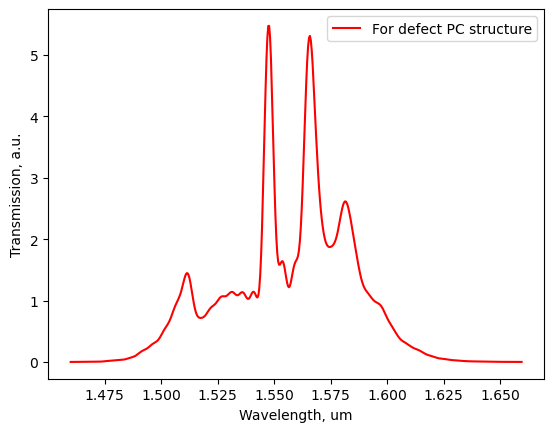

In [8]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

# simfileName_n ='Output-PC-nanobeam-N-25-N_add-10-Flux-without-defect-pixel-avg-ffend_3_v4.txt'
# fileName_n = 'flux-norm-ph-nanobeam-N-25-ffend-pixel-avg_3_v4.dat'

# simfileName_d ='Output-PC-nanobeam-N-25-N_add-10-Flux-pixel-avg_3_v5_2.txt'
# fileName_d = 'flux-defect-ph-nanobeam-N-25-pixel-avg_3_v5_2.dat'

simfileName_d ='Output-PC-nanobeam-N-25-N_add-10-Flux-pixel-avg_3_v4.txt'
fileName_d = 'flux-defect-ph-nanobeam-N-25-pixel-avg_3_v4.dat'


# ex_str_n =f'grep flux1: {simfileName_n}  | cut -d , -f2,3- | sed 1d > {fileName_n}'
ex_str_d =f'grep flux1: {simfileName_d}  | cut -d , -f2,3- | sed 1d > {fileName_d}'

# call(ex_str_n, shell="True")
call(ex_str_d, shell="True")

# f_n = np.genfromtxt(fileName_n, delimiter=",")
f_d = np.genfromtxt(fileName_d, delimiter=",")

# nzd_f = f_d[:,1]/f_n[:,1] # Normalized flux


# fig, ax = plt.subplots()
# ax.plot(1/f_n[:,0],f_n[:,1], 'b-', label='For normal PC structure')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# plt.legend()
# plt.show()

fig, ax = plt.subplots()
ax.plot(1/f_d[:,0],f_d[:,1], 'r-', label='For defect PC structure')
plt.xlabel("Wavelength, um")
plt.ylabel("Transmission, a.u.")
plt.legend()
plt.show()

# fig, ax = plt.subplots()
# ax.plot(1/f_d[:,0],nzd_f/max(nzd_f), 'c-', label='Normalized flux')
# plt.xlabel("Wavelength, um")
# plt.ylabel("Transmission, a.u.")
# # plt.xlim(left=0.88, right=0.94)
# plt.legend()
# plt.show()

In [8]:
! mpirun -np 16 python Test_nanobeam.py > Output-Test-nanobeam.txt

In [12]:
import meep as mp
a_taper = mp.interpolate(3, [0.43,0.33])
print(a_taper)

In [6]:
a_period = [(0.60, 0.50), (0.60, 0.45), (0.60, 0.40), (0.6, 0.35)]

for a_start, a_end in a_period:
    print(a_start)
    print(a_end)

0.6
0.5
0.6
0.45
0.6
0.4
0.6
0.35


In [5]:
import numpy as np
s_cavity = np.arange(0, 0.190, 0.010)
print(s_cavity)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18]
